In [201]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(r'D:\Bike Rental Pattern'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Bike Rental Pattern\day.csv
D:\Bike Rental Pattern\hour.csv


In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import warnings

In [205]:
warnings.filterwarnings('ignore')

In [ ]:
# Gahtering

In [207]:
# Load data (day.csv)
day_df = pd.read_csv(r'D:\Bike Rental Pattern\day.csv')
day_df.head().style.background_gradient(cmap='viridis')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [259]:
# load data (hour.csv)
hour_df = pd.read_csv(r'D:\Bike Rental Pattern\hour.csv')
hour_df.head().style.background_gradient(cmap='viridis')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


In [211]:
# Day dataset information
print("Dataset information:")
print("Rows: ", day_df.shape[0])
print("Columns: ", day_df.shape[1])

Dataset information:
Rows:  731
Columns:  16


In [213]:
# Hour dataset information
print("Dataset information:")
print("Rows: ", hour_df.shape[0])
print("Columns: ", hour_df.shape[1])

Dataset information:
Rows:  17379
Columns:  17


In [215]:
# Check day data type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [217]:
# Check hour data type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [219]:
# Total missing hour values in each column
missing_hour_values = hour_df.isnull().sum()
print("Total missing hour's values in each column")
display(missing_hour_values.to_frame(name="Total Hour Missing Values").style.background_gradient('viridis'))

Total missing hour's values in each column


,Total Hour Missing Values
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [221]:
# Total missing day data values in each column
missing_day_values = day_df.isnull().sum()
print("Total missing values in each column:")
display(missing_day_values.to_frame(name="Total Day Data Missing Value").style.background_gradient('viridis'))

Total missing values in each column:


,Total Day Data Missing Value
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [223]:
# Check duplicated hour data
print("Duplicated values : ", hour_df.duplicated().sum())

Duplicated values :  0


In [225]:
# Check duplicated data
print("Duplicate values : ", day_df.duplicated().sum())

Duplicate values :  0


In [227]:
# Print first 20 column cnt 
print(hour_df['cnt'].head(20))

0      16
1      40
2      32
3      13
4       1
5       1
6       2
7       3
8       8
9      14
10     36
11     56
12     84
13     94
14    106
15    110
16     93
17     67
18     35
19     37
Name: cnt, dtype: int64


In [247]:
# Print fisrt 20 column cnt of day dataset
display(day_df['cnt'].head(20).to_frame().style.background_gradient(cmap='viridis'))

,cnt
0,985
1,801
2,1349
3,1562
4,1600
5,1606
6,1510
7,959
8,822
9,1321


In [231]:
# Checking if there is null value for the cnt column in the hour dataset
print(hour_df['cnt'].isnull().sum())

0


In [261]:
# check hour data outlier
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound =  max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound {lower_bound} and Upper Bound: {upper_bound}")

# Identify outliers of hour dataset
outliers = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]
print(f"Length of Outliers: {len(outliers)}")
outliers.head().style.background_gradient(cmap='viridis')

Lower bound 0 and Upper Bound: 642.5
Length of Outliers: 505


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.720000,0.651500,0.300000,0.089600,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.620000,0.621200,0.380000,0.417900,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.600000,0.621200,0.430000,0.194000,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.700000,0.636400,0.370000,0.104500,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.700000,0.636400,0.340000,0.298500,96,638,734


In [249]:
# check day dataset outlier
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound =  max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR
print("Min cnt: ", df_day['cnt'].min())
print("Max cnt: ", df_day['cnt'].max())
print(f"Lower bound: {lower_bound} & Upper Bound: {upper_bound}")

# Identfy outliers
outliers = day_df[(df_day["cnt"] < lower_bound) | (day_df["cnt"] > upper_bound)]
print(f"Length of Outliers: {len(outliers)}")
outliers.head().style.background_gradient(cmap="viridis")

Min cnt:  nan
Max cnt:  nan
Lower bound: 0 & Upper Bound: 10162.0
Length of Outliers: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [263]:
# remove hour dataset outliers
print("Shape before removing outliers: ", hour_df.shape)
hour_df = hour_df[(hour_df['cnt'] >= lower_bound) & (hour_df['cnt'] <= upper_bound)]
print("Shape after removing outliers: ", hour_df.shape, )

Shape before removing outliers:  (17379, 17)
Shape after removing outliers:  (16874, 17)


In [265]:
# Convert the 'dtday' column from object type to 'datetime'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

In [267]:
# Convert the 'dteday' of dialy dataset to 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Feature Engineering

In [269]:
# Create a new time-based feature for the hourly dataset
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()

In [271]:
# Create  a new time-based  feature  for the daily dataset
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

In [279]:
# Map season values
season_map  = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_name'] = hour_df['season'].map(season_map)
day_df['season_name'] = day_df['season'].map(season_map)

# Map weather situation
weather_map = {
    1: 'Clear/Parity Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Precipitation',
    4: 'Heavy Precipitation'
}
hour_df['weather_condition'] = hour_df['weathersit'].map(weather_map)
day_df['weather_condition'] = day_df['weathersit'].map(weather_map)

In [281]:
# Percentage of casual vs registered users
hour_df['casual_pct'] = hour_df['casual'] / hour_df['cnt'] * 100
hour_df['registered_pct'] = hour_df['registered'] / hour_df['cnt'] * 100

day_df['casual_pct'] = day_df['casual'] / day_df['cnt'] * 100
day_df['registered_ pct'] = day_df['registered'] / day_df['cnt'] * 100

In [283]:
print("Data cleaning completed")
print(f"Hourly dataset shape after data cleaning: {hour_df.shape}")
print(f"Daily dataset shape after data cleaning: {day_df.shape}")

Data cleaning completed
Hourly dataset shape after data cleaning: (16874, 25)
Daily dataset shape after data cleaning: (731, 24)


In [285]:
hour_df.info()
hour_df.head().style.background_gradient(cmap='viridis')

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            16874 non-null  int64         
 1   dteday             16874 non-null  datetime64[ns]
 2   season             16874 non-null  int64         
 3   yr                 16874 non-null  int64         
 4   mnth               16874 non-null  int64         
 5   hr                 16874 non-null  int64         
 6   holiday            16874 non-null  int64         
 7   weekday            16874 non-null  int64         
 8   workingday         16874 non-null  int64         
 9   weathersit         16874 non-null  int64         
 10  temp               16874 non-null  float64       
 11  atemp              16874 non-null  float64       
 12  hum                16874 non-null  float64       
 13  windspeed          16874 non-null  float64       
 14  casual     

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week,season_name,weather_condition,casual_pct,registered_pct
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,2011,1,1,Saturday,Spring,Clear/Parity Cloudy,18.750000,81.250000
1,2,2011-01-01 00:00:00,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,2011,1,1,Saturday,Spring,Clear/Parity Cloudy,20.000000,80.000000
2,3,2011-01-01 00:00:00,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,2011,1,1,Saturday,Spring,Clear/Parity Cloudy,15.625000,84.375000
3,4,2011-01-01 00:00:00,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13,2011,1,1,Saturday,Spring,Clear/Parity Cloudy,23.076923,76.923077
4,5,2011-01-01 00:00:00,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1,2011,1,1,Saturday,Spring,Clear/Parity Cloudy,0.000000,100.000000


In [287]:
day_df.info()
day_df.head().style.background_gradient(cmap='viridis')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   yr                 731 non-null    int64         
 4   mnth               731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weathersit         731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  hum                731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week,season_name,weather_condition,casual_pct,registered_ pct
0,1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,Saturday,Spring,Mist/Cloudy,33.604061,66.395939
1,2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,Sunday,Spring,Mist/Cloudy,16.354557,83.645443
2,3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,Monday,Spring,Clear/Parity Cloudy,8.895478,91.104522
3,4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,Tuesday,Spring,Clear/Parity Cloudy,6.914213,93.085787
4,5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,Wednesday,Spring,Clear/Parity Cloudy,5.125000,94.875000


In [293]:
# Describe statistics 
hour_desc_stat = (
    hour_df.select_dtypes(include=['number']).describe().T.style
    .background_gradient(cmap='viridis')
    .set_caption("Descriptive Statistics of Numeric Variable")
)

hour_desc_stat

,count,mean,std,min,25%,50%,75%,max
instant,16874.000000,8542.168899,5007.766040,1.000000,4219.250000,8438.500000,12832.750000,17379.000000
season,16874.000000,2.490399,1.111966,1.000000,1.000000,2.000000,3.000000,4.000000
yr,16874.000000,0.487733,0.499864,0.000000,0.000000,0.000000,1.000000,1.000000
mnth,16874.000000,6.513275,3.462438,1.000000,4.000000,7.000000,10.000000,12.000000
hr,16874.000000,11.458101,6.962144,0.000000,5.000000,11.000000,18.000000,23.000000
holiday,16874.000000,0.029513,0.169244,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,16874.000000,2.997748,2.013054,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,16874.000000,0.678618,0.467021,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,16874.000000,1.430663,0.642689,1.000000,1.000000,1.000000,2.000000,4.000000
temp,16874.000000,0.492650,0.192455,0.020000,0.340000,0.500000,0.640000,1.000000


In [295]:
day_desc_stat = (
    day_df.select_dtypes(include=['number']).describe().T.style
    .background_gradient(cmap='viridis')
    .set_caption("Descriptive Statistic for Numeric Variables")
)
day_desc_stat

,count,mean,std,min,25%,50%,75%,max
instant,731.000000,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.000000,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.000000,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.000000,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.000000,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.000000,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.000000,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.000000,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.000000,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.000000,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [297]:
# Quick overview of categorical feature distribution

In [305]:
print("Season distribution in hourly data:")
season_name = hour_df['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print("\nWeather condition distribution in hourly data:")
weather_condition = hour_df['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print("\nWorkingday distribution in hourly data:")
working_day = hour_df['workingday'].value_counts()
display(working_day.to_frame().style.background_gradient(cmap='viridis'))

print("\nHoliday distribution in houly data:")
holiday = hour_df['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))

Season distribution in hourly data:


,count
season_name,
Fall,4298
Summer,4253
Spring,4223
Winter,4100



Weather condition distribution in hourly data:


,count
weather_condition,
Clear/Parity Cloudy,11020
Mist/Cloudy,4444
Light Precipitation,1407
Heavy Precipitation,3



Workingday distribution in hourly data:


,count
workingday,
1,11451
0,5423



Holiday distribution in houly data:


,count
holiday,
0,16376
1,498


In [305]:
print("Season distribution in hourly data:")
season_name = hour_df['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print("\nWeather condition distribution in hourly data:")
weather_condition = hour_df['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print("\nWorkingday distribution in hourly data:")
working_day = hour_df['workingday'].value_counts()
display(working_day.to_frame().style.background_gradient(cmap='viridis'))

print("\nHoliday distribution in houly data:")
holiday = hour_df['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))

Season distribution in hourly data:


,count
season_name,
Fall,4298
Summer,4253
Spring,4223
Winter,4100



Weather condition distribution in hourly data:


,count
weather_condition,
Clear/Parity Cloudy,11020
Mist/Cloudy,4444
Light Precipitation,1407
Heavy Precipitation,3



Workingday distribution in hourly data:


,count
workingday,
1,11451
0,5423



Holiday distribution in houly data:


,count
holiday,
0,16376
1,498


In [307]:
print("Season distribution in daily data:")
season_name = day_df['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print("\nWeather condition distribution in daily data:")
weather_condition = day_df['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print("\nWorkingday distribution in daily data:")
working_day = day_df['workingday'].value_counts()
display(working_day.to_frame().style.background_gradient(cmap='viridis'))

print("\nHoliday distribution in daily data:")
holiday = day_df['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))

Season distribution in daily data:


,count
season_name,
Fall,188
Summer,184
Spring,181
Winter,178



Weather condition distribution in daily data:


,count
weather_condition,
Clear/Parity Cloudy,463
Mist/Cloudy,247
Light Precipitation,21



Workingday distribution in daily data:


,count
workingday,
1,500
0,231



Holiday distribution in daily data:


,count
holiday,
0,710
1,21


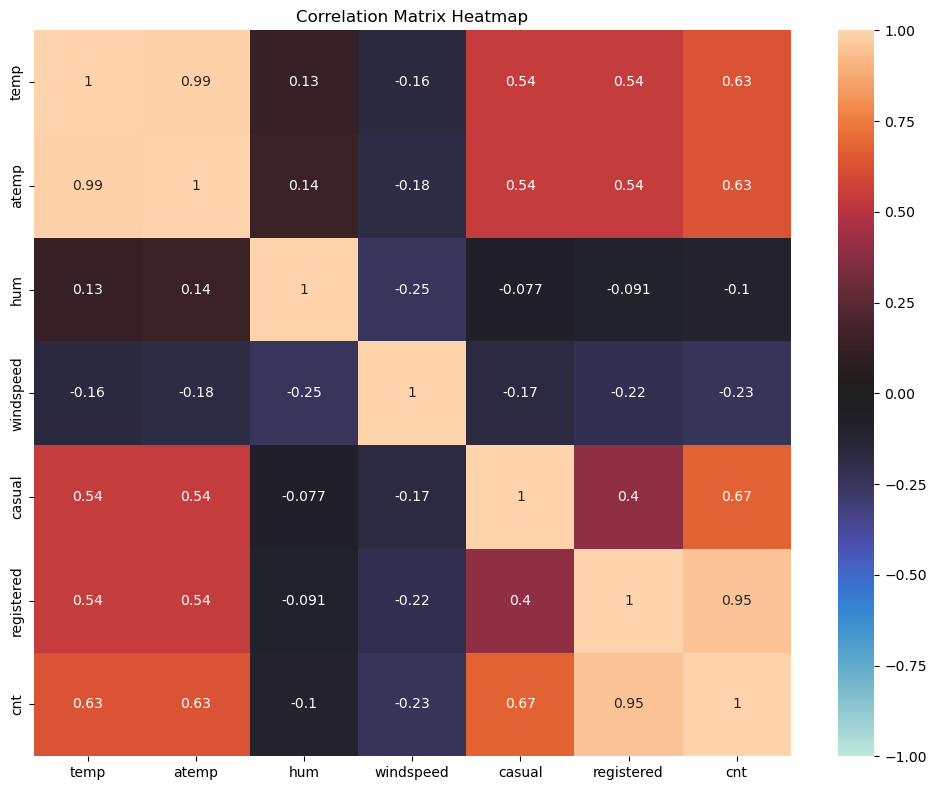


Correlation matrix
                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


In [337]:
# Correlation matrix
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("\nCorrelation matrix")
print(correlation_matrix)

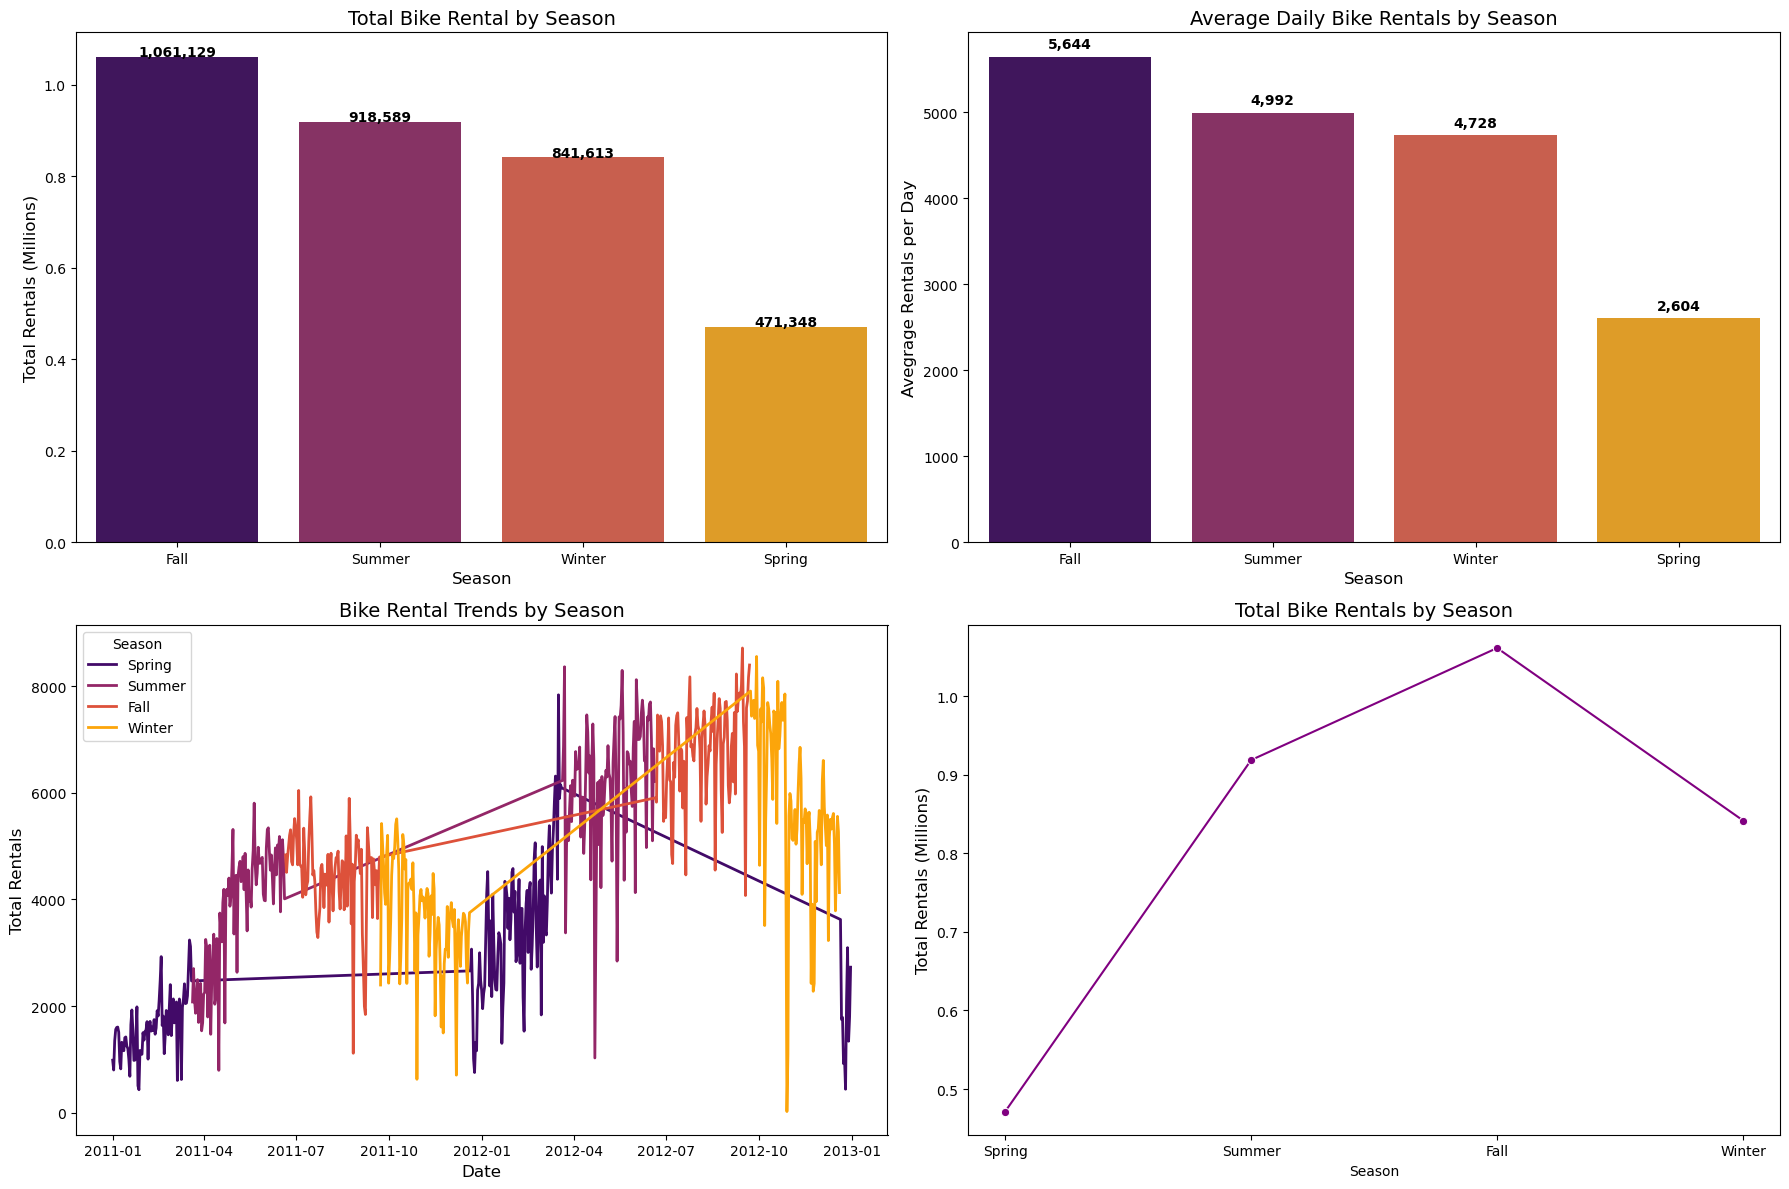

In [349]:
# Calculate seasonal statistics
seasonal_stats = day_df.groupby("season_name")["cnt"].agg(["mean", "sum"]).sort_values("sum", ascending=False)

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Bar Chart 1: Total Bike Rentals by Season
sns.barplot(x=seasonal_stats.index, y=seasonal_stats["sum"], palette="inferno", ax=axes[0, 0])
axes[0, 0].set_title("Total Bike Rental by Season", fontsize=14)
axes[0, 0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0, 0].set_xlabel("Season", fontsize=12)
axes[0, 0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Add value labels above each bar
for i, v in enumerate(seasonal_stats["sum"]):
    axes[0, 0].text(i, v + 1000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Bar chart 2: Average Daily Bike Rentals by season
sns.barplot(x=seasonal_stats.index,  y=seasonal_stats['mean'], palette="inferno", ax=axes[0, 1])
axes[0, 1].set_title("Average Daily Bike Rentals by Season", fontsize=14)
axes[0, 1].set_ylabel("Avegrage Rentals per Day", fontsize=12)
axes[0, 1].set_xlabel("Season", fontsize=12)

# Add value labels above each bar
for i, v in enumerate(seasonal_stats["mean"]):
    axes[0, 1].text(i, v + 100, f"{v:,.0f}", ha="center",  fontsize=10, fontweight='bold')

# Line chart 1: Rentals Trends Over time by Season
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='season_name', palette='inferno', linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title("Bike Rental Trends by Season", fontsize=14)
axes[1, 0].set_ylabel("Total Rentals", fontsize=12)
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].legend(title="Season")

# Line Chart 2: Total Rentals per Season
sns.lineplot(x='season_name', y='cnt', data=day_df, estimator='sum', ci=None, marker='o', color='purple', ax=axes[1, 1])
axes[1, 1].set_title("Total Bike Rentals by Season", fontsize=14)
axes[1, 1].set_ylabel('Total Rentals (Millions)', fontsize=12)
axes[1, 1].set_xlabel("Season")
axes[1, 1].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.tight_layout()
plt.show()

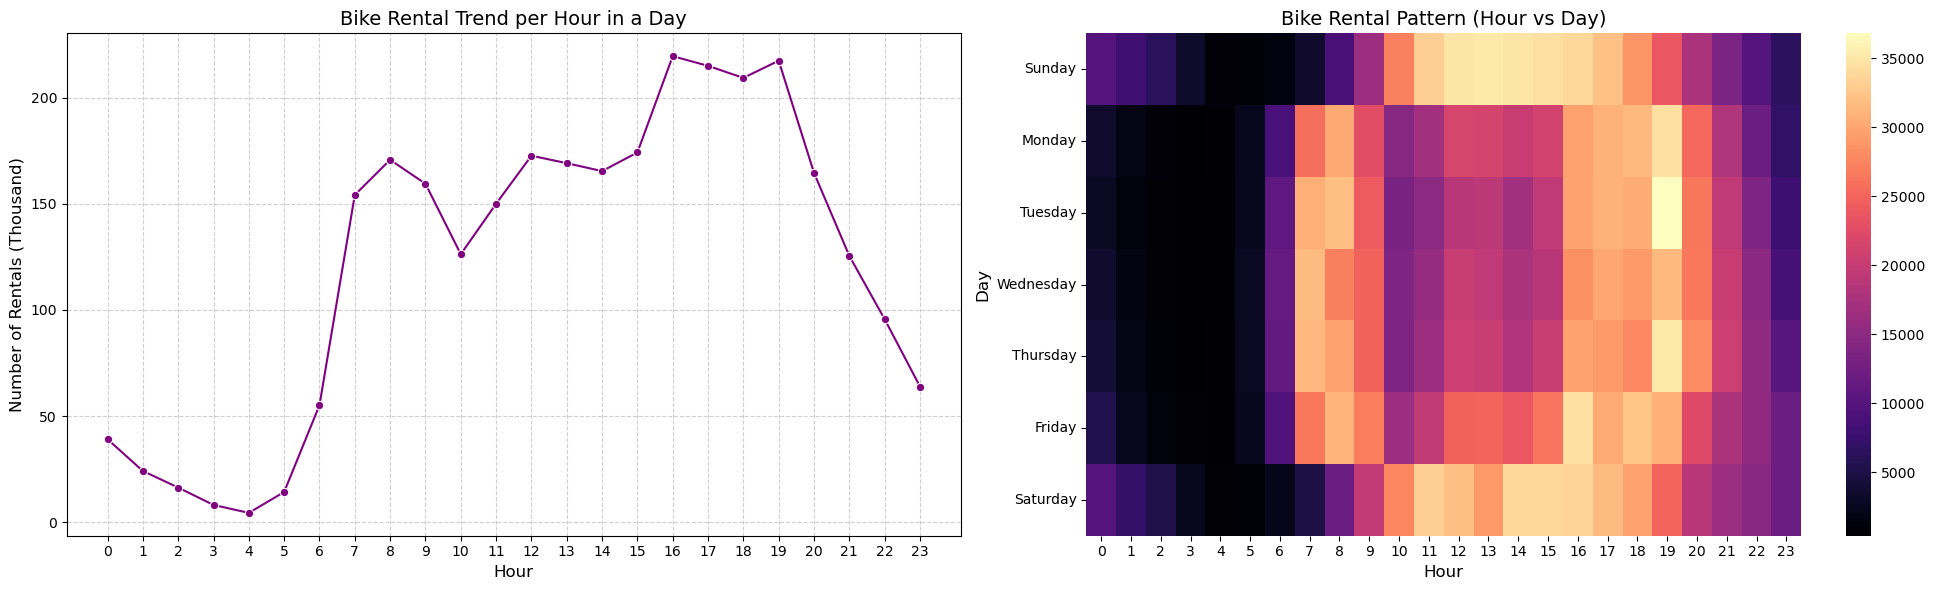

In [377]:
# Order of the days in the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']

# Create visualization in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Line Chart - Bike Rental Trend per Hour
sns.lineplot(x="hr", y='cnt', data=hour_df, estimator='sum', ci=None, marker='o', color='purple', ax=axes[0])
axes[0].set_title("Bike Rental Trend per Hour in a Day", fontsize=14)
axes[0].set_ylabel("Number of Rentals (Thousand)", fontsize=12)
axes[0].set_xlabel("Hour", fontsize=12)
axes[0].set_xticks(range(0, 24, 1)) # A grid set based on hours (0-24)
axes[0].grid(axis="both", linestyle="--", alpha=0.6) # Add grid
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e3:.0f}")

# Heatmap - Bike Rentals per hour and Day
heatmap_data = hour_df.pivot_table(values='cnt', index='day_of_week', columns='hr', aggfunc='sum')
heatmap_data = heatmap_data.reindex(day_order) # Reorder by correct day sequency

sns.heatmap(heatmap_data, cmap='magma', ax=axes[1])
axes[1].set_title("Bike Rental Pattern (Hour vs Day)", fontsize=14)
axes[1].set_ylabel("Day", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)

plt.tight_layout()
plt.show()

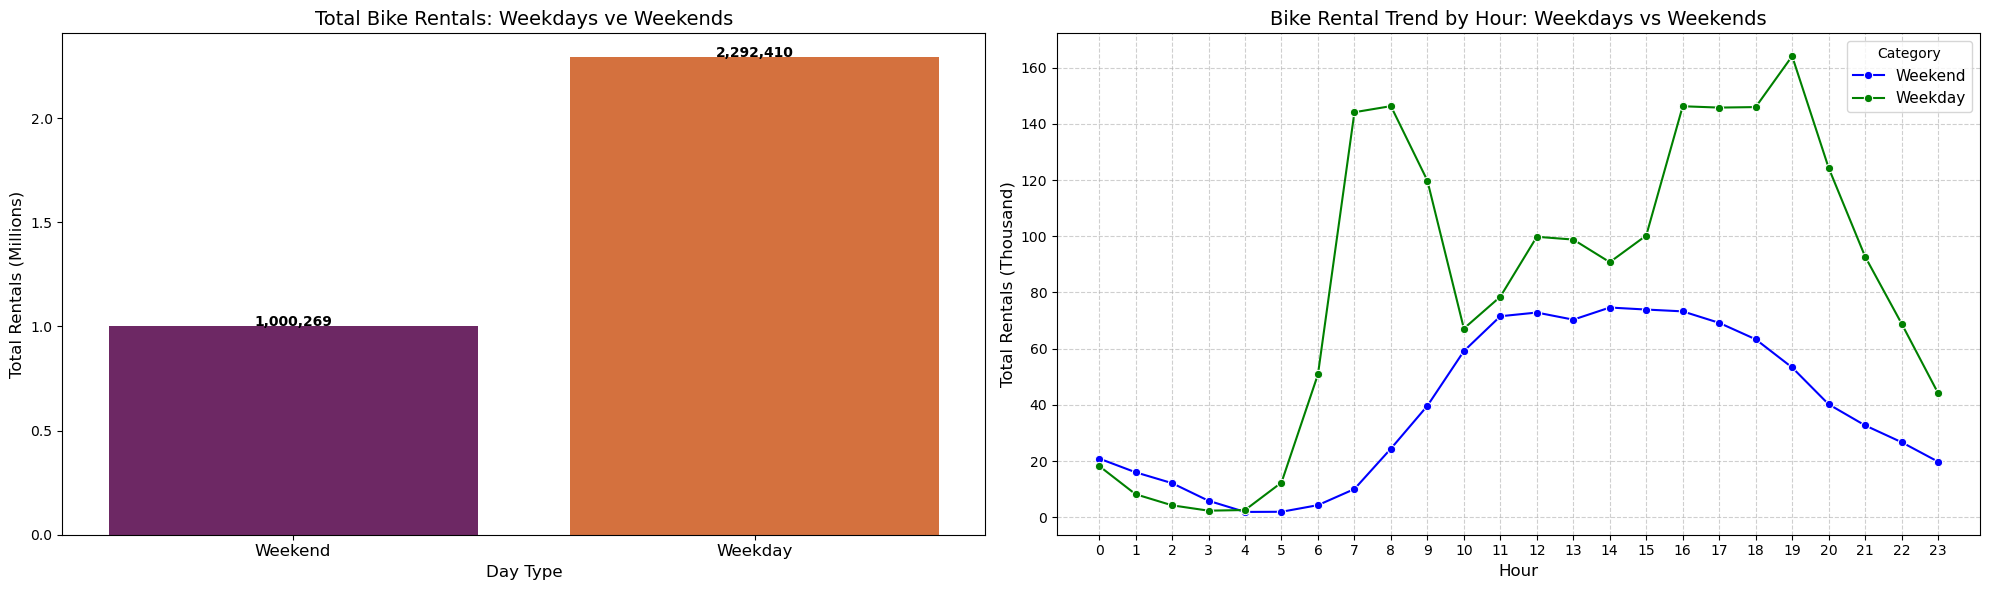

In [391]:
# Create visualizations in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Grouped Bar Chart - Total Bike Rentals on Weekdays vs Weekends
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=sum, ci=None, palette='inferno', ax=axes[0])
axes[0].set_title("Total Bike Rentals: Weekdays ve Weekends", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Weekend', 'Weekday'], fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].set_xlabel("Day Type", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Add value labels above each bar
for i, v in enumerate(day_df.groupby("workingday")['cnt'].sum()):
    axes[0].text(i, v + 3000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart - Rental Trend Throughout the Day: Weekdays vs Weekends
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hour_df, estimator=sum, ci=None, marker="o", palette=['blue', 'green'], ax=axes[1])
axes[1].set_title("Bike Rental Trend by Hour: Weekdays vs Weekends", fontsize=14)
axes[1].set_ylabel("Total Rentals (Thousand)", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))
axes[1].grid(axis='both', linestyle='--', alpha=0.6)
axes[1].legend(["Weekend", "Weekday"], title='Category', fontsize=11)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()

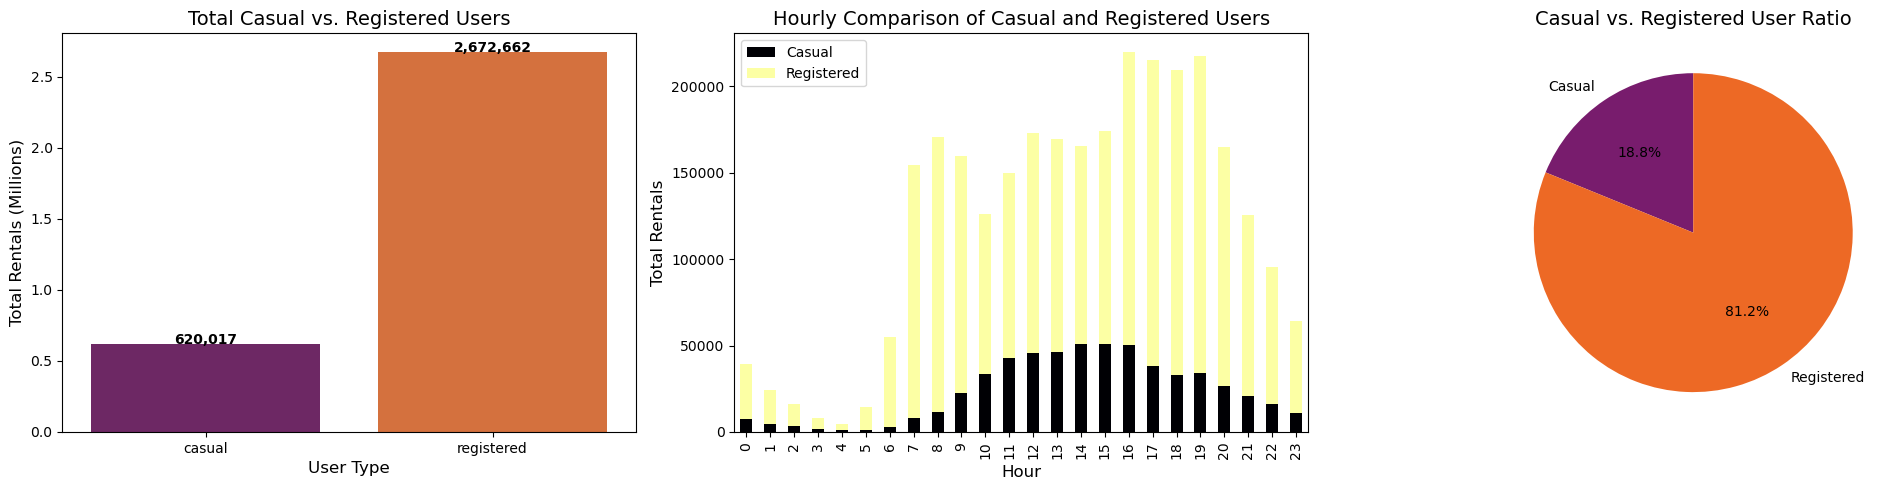

In [399]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Bar Chart: Total Casual vs. Registered Users
user_distribution = day_df[["casual", "registered"]].sum()
sns.barplot(x=user_distribution.index, y=user_distribution.values, palette="inferno", ax=axes[0])
axes[0].set_title("Total Casual vs. Registered Users", fontsize=14)
axes[0].set_xlabel("User Type", fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Add data labels above each bar
for i, v in enumerate(user_distribution.values):
    axes[0].text(i, v + 1500, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Stacked Bar Chart: Casual vs. Registered Users per Hour
hourly_grouped = hour_df.groupby("hr")[["casual", "registered"]].sum().reset_index()
hourly_grouped.plot(x="hr", kind="bar", stacked=True, colormap="inferno", ax=axes[1])
axes[1].set_title("Hourly Comparison of Casual and Registered Users", fontsize=14)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_ylabel("Total Rentals", fontsize=12)
axes[1].legend(["Casual", "Registered"])

# Pie Chart: Ratio of Casual vs. Registered Users
axes[2].pie(user_distribution, labels=["Casual", "Registered"], autopct="%1.1f%%", colors=sns.color_palette("inferno", 2), startangle=90)
axes[2].set_title("Casual vs. Registered User Ratio", fontsize=14)

plt.tight_layout()
plt.show()

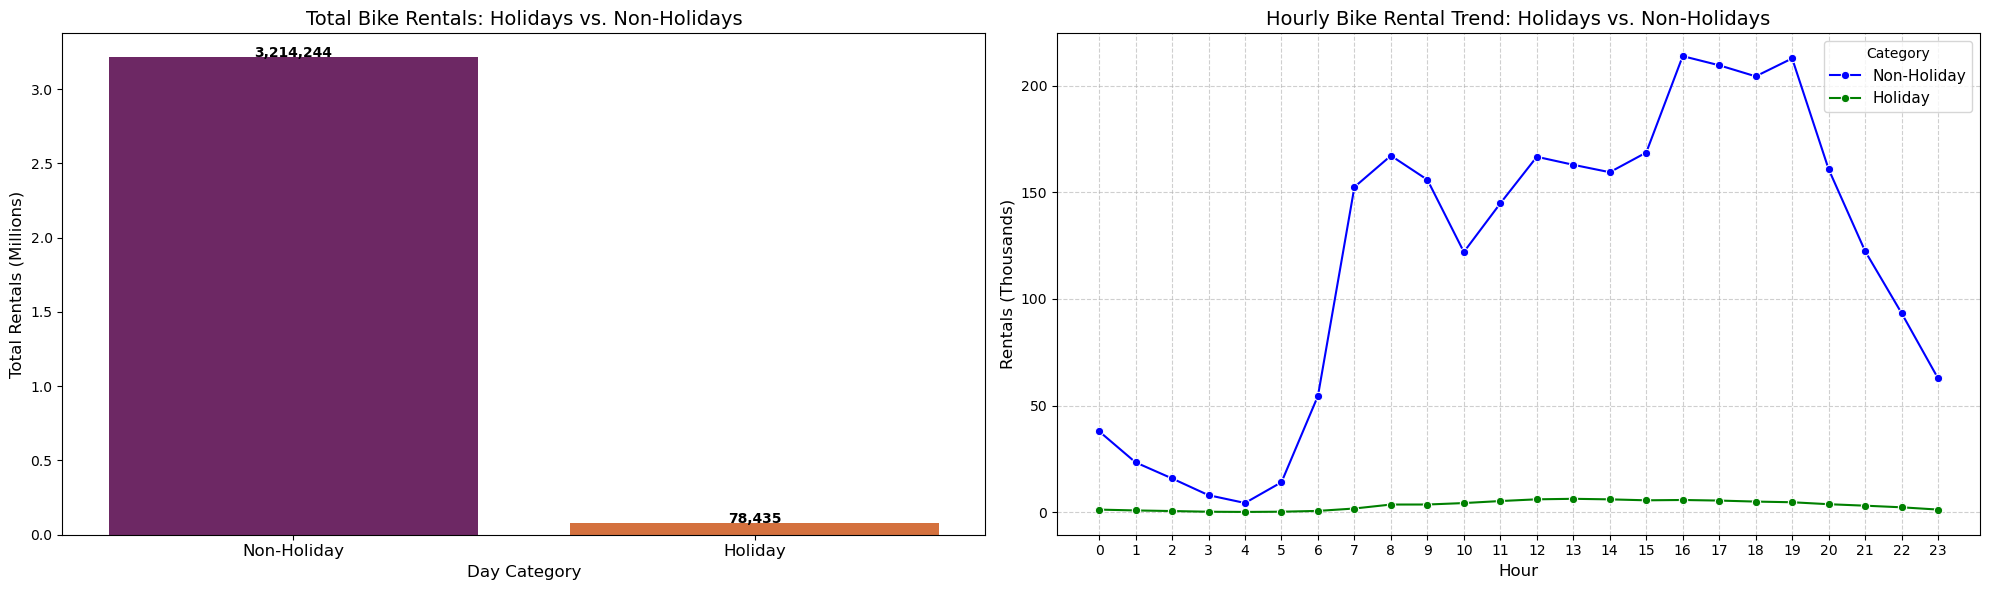

In [405]:
 # Create visualizations in 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Grouped Bar Chart - Total Rentals on Holidays vs. Non-Holidays
sns.barplot(x="holiday", y="cnt", data=day_df, estimator=sum, ci=None, palette="inferno", ax=axes[0])
axes[0].set_title("Total Bike Rentals: Holidays vs. Non-Holidays", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Non-Holiday", "Holiday"], fontsize=12)
axes[0].set_ylabel("Total Rentals (Millions)", fontsize=12)
axes[0].set_xlabel("Day Category", fontsize=12)

# Format y-axis labels in millions for readability
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e6:.1f}"))

# Add value labels above each bar
for i, v in enumerate(day_df.groupby("holiday")["cnt"].sum()):
    axes[0].text(i, v + 3000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart - Rental Trends on Holidays vs. Non-Holidays
sns.lineplot(x="hr", y="cnt", hue="holiday", data=hour_df, estimator=sum, ci=None, marker="o", palette=["blue", "green"], ax=axes[1])
axes[1].set_title("Hourly Bike Rental Trend: Holidays vs. Non-Holidays", fontsize=14)
axes[1].set_ylabel("Rentals (Thousands)", fontsize=12)
axes[1].set_xlabel("Hour", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))  # Set x-axis grid to 24 hours
axes[1].grid(axis="both", linestyle="--", alpha=0.6)  # Add grid lines
axes[1].legend(["Non-Holiday", "Holiday"], title="Category", fontsize=11)

# Format y-axis in thousands
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()

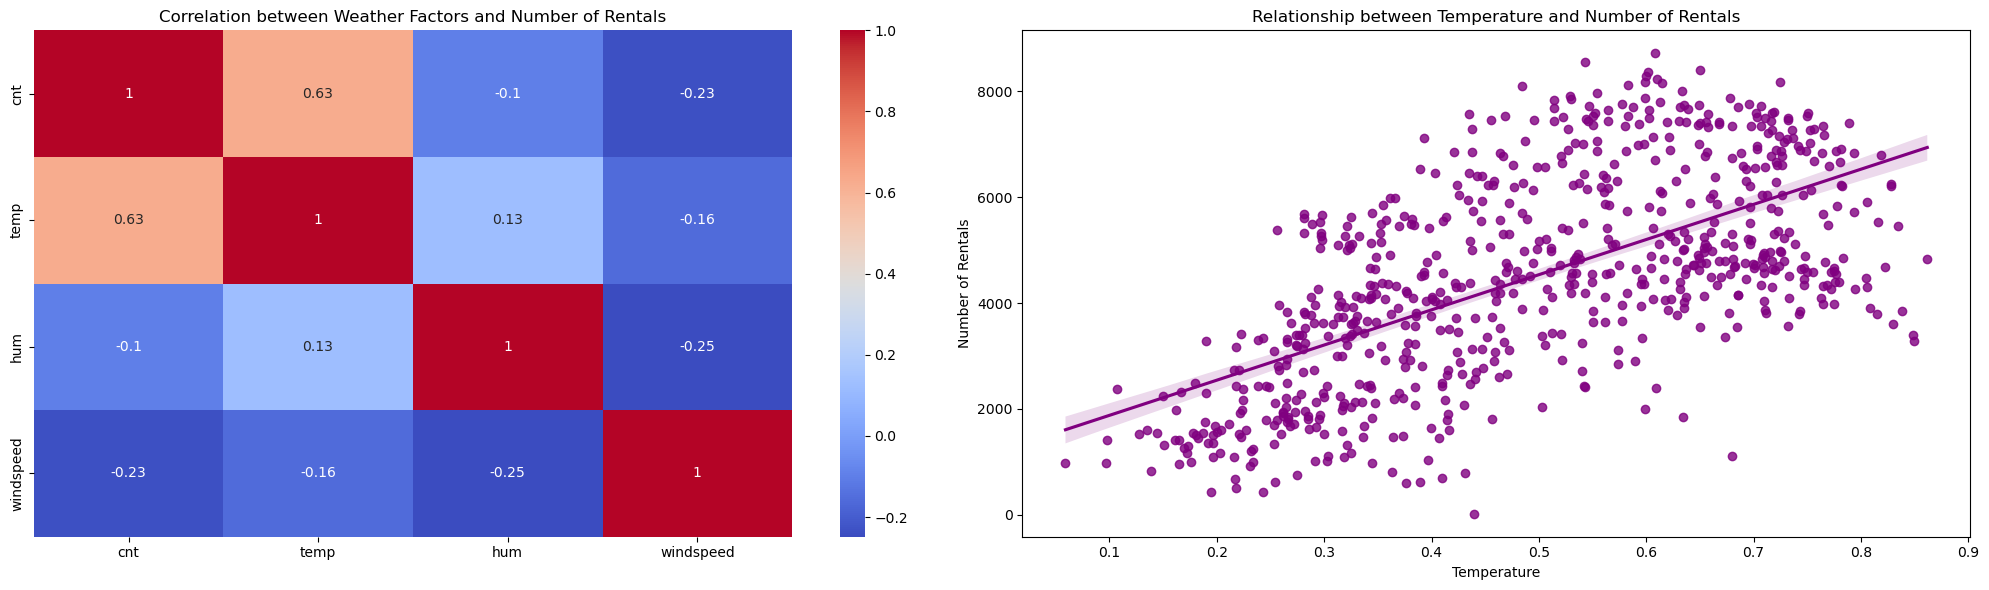

In [409]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Heatmap - Correlation Matrix
corr_matrix = day_df[["cnt", "temp", "hum", "windspeed"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation between Weather Factors and Number of Rentals")

# Scatter Plot with Correlation Line - Temp vs. Rentals
sns.regplot(x="temp", y="cnt", data=day_df, ax=axes[1], color="purple")
axes[1].set_title("Relationship between Temperature and Number of Rentals")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("Number of Rentals")

plt.tight_layout()
plt.show()

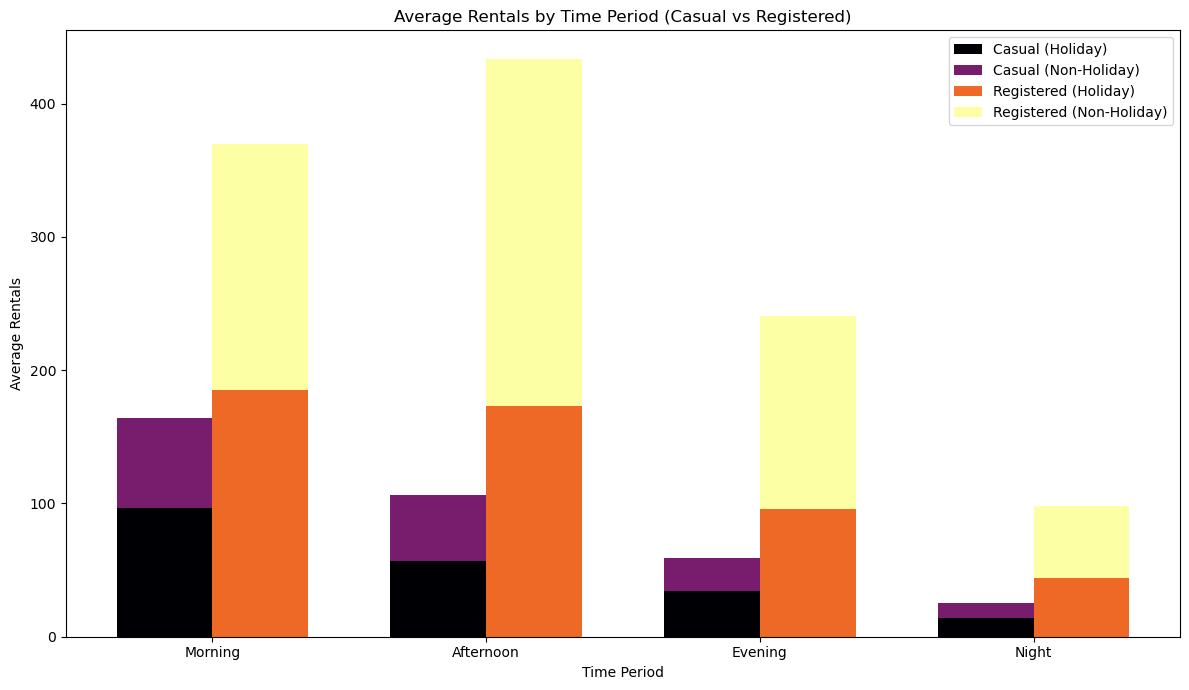

In [414]:
# Clustering
# Define time categories based on the hour of the day
def categorize_time(hour):
    if 5 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 17 <= hour <= 20:
        return "Evening"
    else:
        return "Night"

# Add a new column for time category
hour_df["TimePeriod"] = hour_df["hr"].apply(categorize_time)

# Group data by TimePeriod and holiday
time_period_clusters = hour_df.groupby(["TimePeriod", "holiday"]).agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Generate colors using the Viridis colormap
inferno = cm.get_cmap("inferno", 4)
colors = {
    "holiday_casual": mcolors.to_hex(inferno(0)),
    "non_holiday_casual": mcolors.to_hex(inferno(1)),
    "holiday_registered": mcolors.to_hex(inferno(2)),
    "non_holiday_registered": mcolors.to_hex(inferno(3))
}

# Visualize clustering results
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35  # Bar width
time_labels = ["Morning", "Afternoon", "Evening", "Night"]
index = np.arange(len(time_labels))

# Split data into holiday and non-holiday
holiday_data = time_period_clusters[time_period_clusters["holiday"] == 1]
non_holiday_data = time_period_clusters[time_period_clusters["holiday"] == 0]

# Plot stacked bars for casual users
ax.bar(index, 
       holiday_data["casual"], 
       bar_width, label="Casual (Holiday)", color=colors["holiday_casual"])

ax.bar(index, 
       non_holiday_data["casual"], 
       bar_width, bottom=holiday_data["casual"], label="Casual (Non-Holiday)", color=colors["non_holiday_casual"])

# Plot stacked bars for registered users
ax.bar(index + bar_width, 
       holiday_data["registered"], 
       bar_width, label="Registered (Holiday)", color=colors["holiday_registered"])

ax.bar(index + bar_width, 
       non_holiday_data["registered"], 
       bar_width, bottom=holiday_data["registered"], label="Registered (Non-Holiday)", color=colors["non_holiday_registered"])

# Add labels and legend
ax.set_xlabel("Time Period")
ax.set_ylabel("Average Rentals")
ax.set_title("Average Rentals by Time Period (Casual vs Registered)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(time_labels)
ax.legend()

plt.tight_layout()
plt.show()